In [1]:
from pathlib import Path
from stardist.matching import matching_dataset
from tifffile import imread
from tqdm.notebook import tqdm

from benchmark_instance import plot_performance

In [2]:
path_images = Path.home() / "Desktop/Code/CELLSEG_BENCHMARK"
gt_path = path_images / "TPH2_mesospim/test_data/labels/isotropic_visual.tif"
results = path_images / "RESULTS/full data/instance"
predictions = [imread(str(p)) for p in sorted(results.glob("*.tif"))]
pred_names = [p.name for p in sorted(results.glob("*.tif"))]

In [3]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Y_val = imread(str(gt_path))

Validating on instance_threshold_pred_SegResNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_threshold_pred_Swin_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_threshold_pred_TRAILMAP_DiceCE_best_metric.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on instance_threshold_pred_VNet_Generalized_latest.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on isotropic_visual_cp_masks.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************
Validating on stardist_labels.tif


  0%|          | 0/9 [00:00<?, ?it/s]

********************


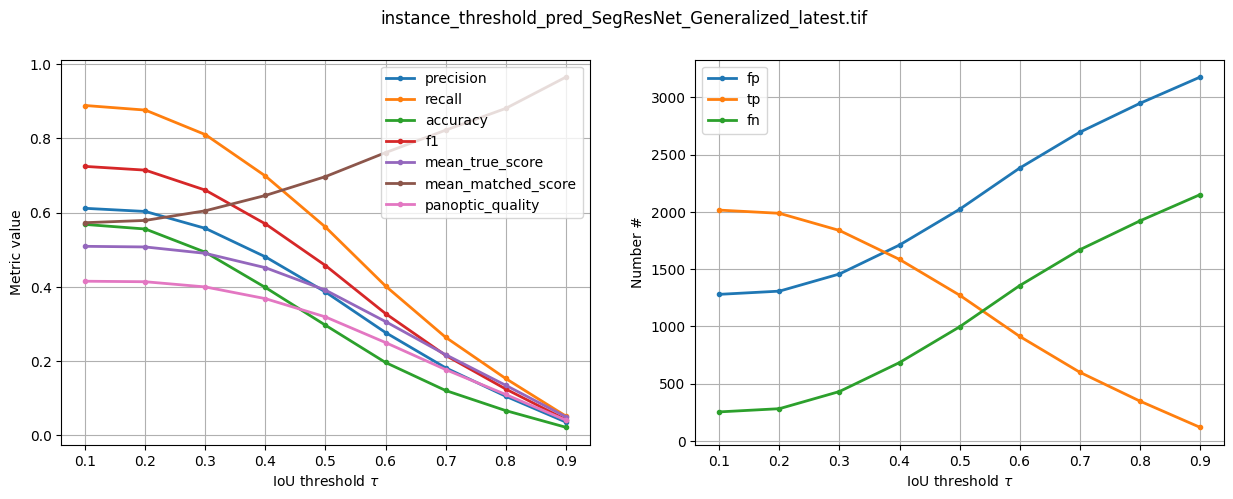

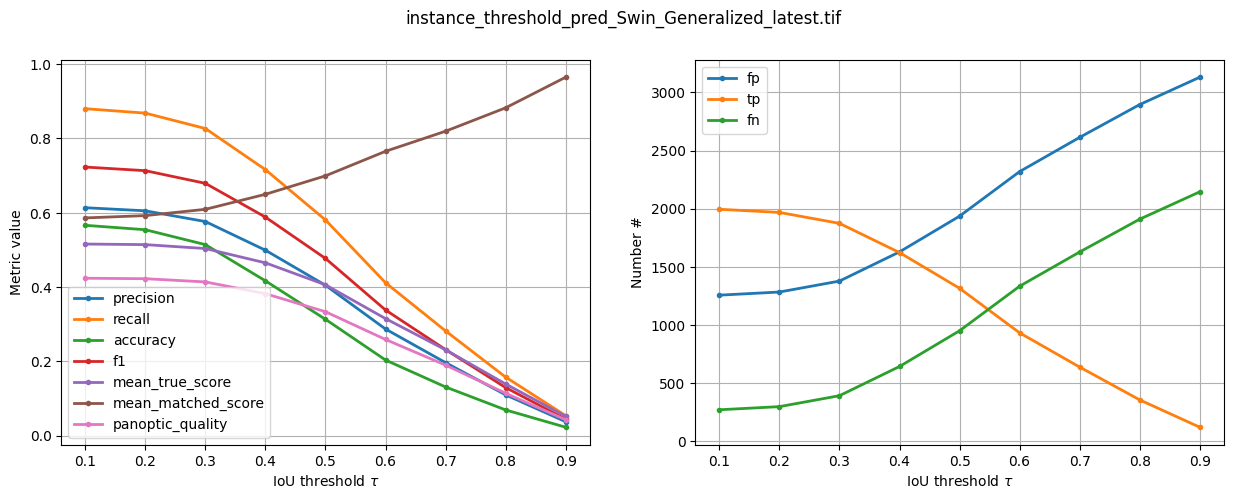

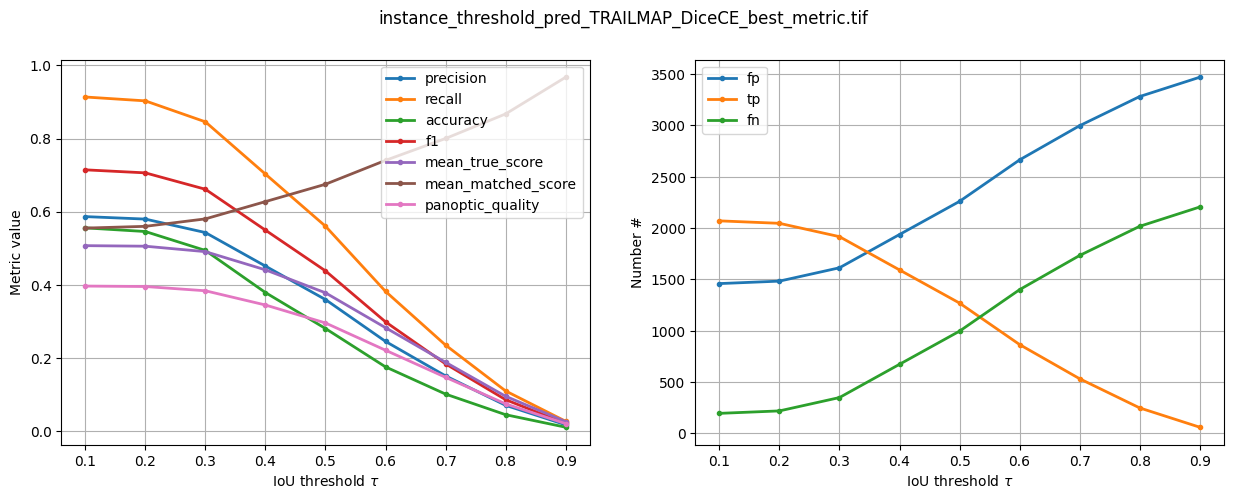

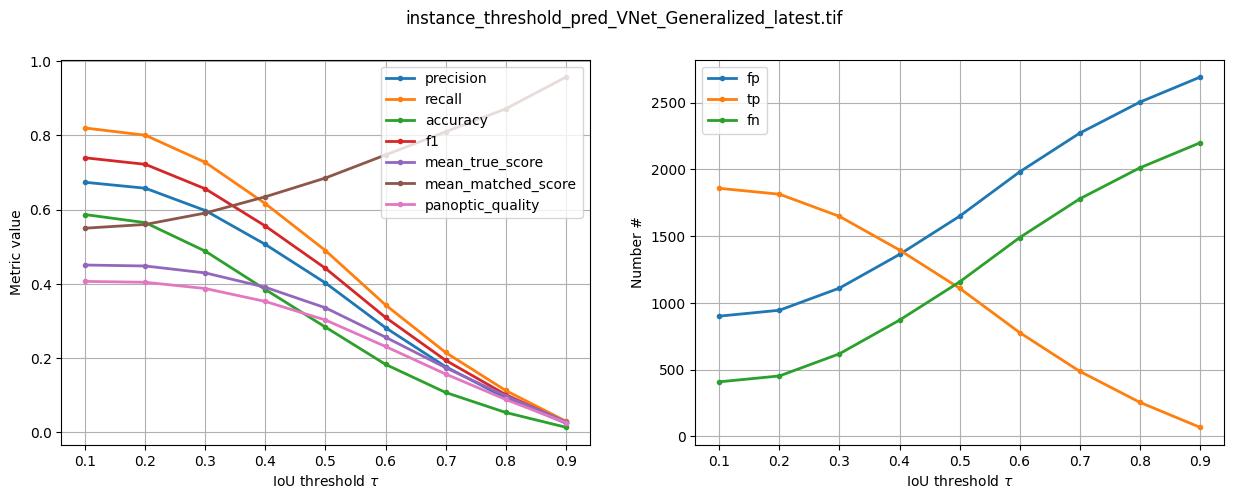

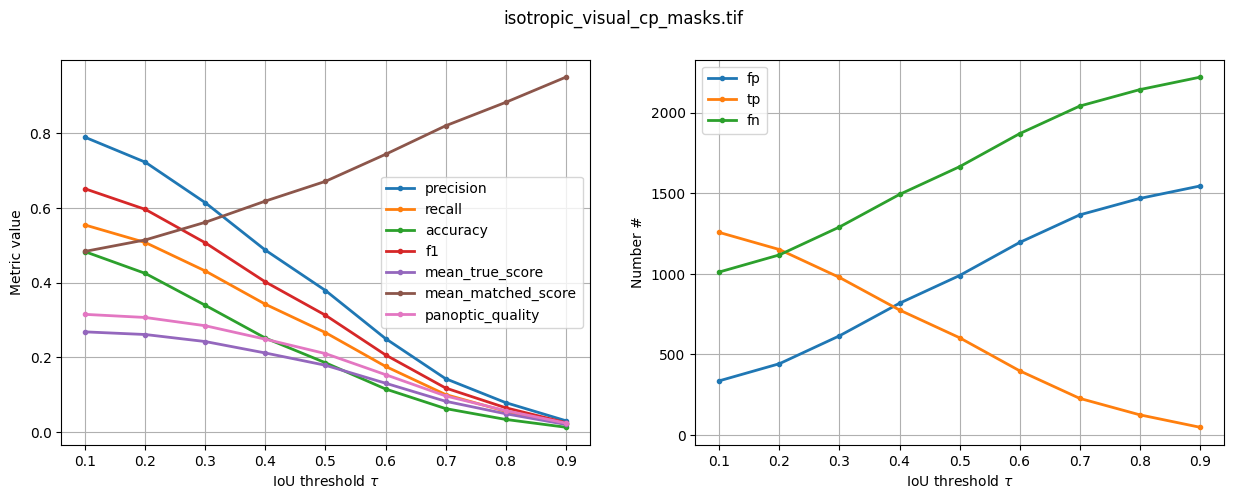

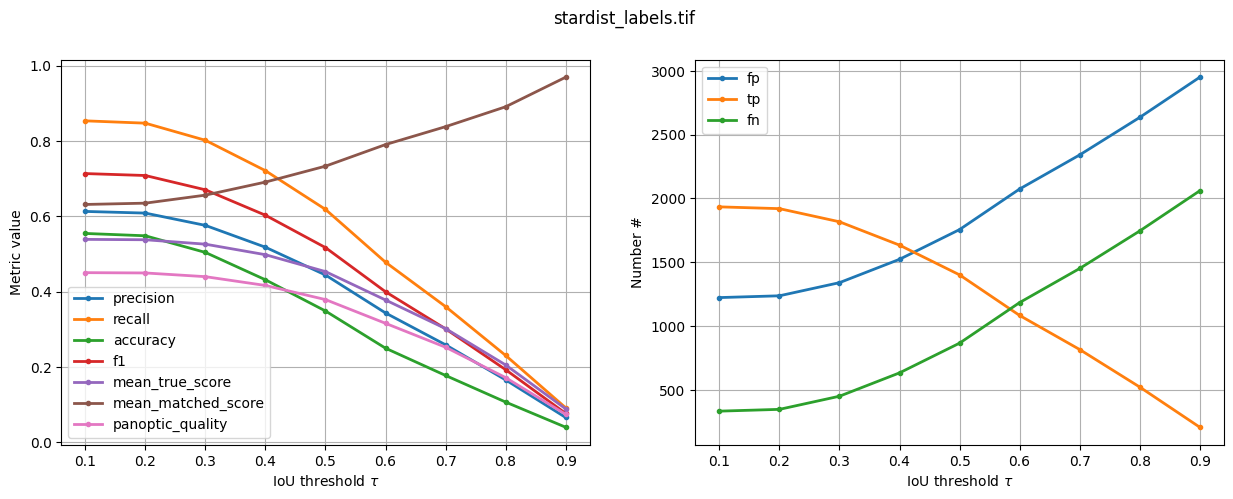

In [4]:
for i, p in enumerate(predictions):
    Y_val_pred = p
    print(f"Validating on {pred_names[i]}")
    stats = [matching_dataset(Y_val, Y_val_pred, thresh=t, show_progress=False) for t in tqdm(taus)]
    plot_performance(taus, stats, name=pred_names[i])
    print("*"*20)